# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:

#Set the limit equal to 1
limit = 1

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    #Obtain the lat and lon of a city.
    city_lat_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&limit={limit}&appid={weather_api_key}"

    

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response_coordinates = requests.get(city_lat_url)
        data_coord = response_coordinates.json()

        #Copy the lattitude and longitude
        lat = data_coord[0]['lat']
        lon = data_coord[0]['lon']

        #Obtain the city weather
        city_weather = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}"

        response_weather = requests.get(city_weather)
        weather_data = response_weather.json()
        
        # Parse the JSON and retrieve data
        city_weather = weather_data['weather'][0]['main']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_data['coord']['lat']
        city_lng = weather_data['coord']['lon']
        city_max_temp = weather_data['main']['temp_max']
        city_humidity = weather_data['main']['humidity']
        city_clouds = weather_data['clouds']['all']
        city_wind = weather_data['wind']['speed']
        city_country = weather_data['sys']['country']
        city_date = weather_data['sys']['sunrise']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ji parana
Processing Record 2 of Set 1 | piedade
Processing Record 3 of Set 1 | port glaud
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | fuvahmulah
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | port mathurin
Processing Record 10 of Set 1 | dharchula
Processing Record 11 of Set 1 | hwange
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | pio xii
Processing Record 14 of Set 1 | olyokminsk
Processing Record 15 of Set 1 | nadi
Processing Record 16 of Set 1 | zacatepec
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | hengchun
Processing Record 20 of Set 1 | telaga batu
Processing Record 21 of Set 1 | vorgashor
Processing Record 22 of Set 1 | thompson
Processing Record 23 of Set 1 | hammerfe

In [9]:
city_data

[{'City': 'ji parana',
  'Lat': -10.8778,
  'Lng': -61.9278,
  'Max Temp': 305.83,
  'Humidity': 23,
  'Cloudiness': 2,
  'Wind Speed': 1.79,
  'Country': 'BR',
  'Date': 1724235406},
 {'City': 'piedade',
  'Lat': -23.7074,
  'Lng': -47.4252,
  'Max Temp': 297.29,
  'Humidity': 43,
  'Cloudiness': 2,
  'Wind Speed': 3.51,
  'Country': 'BR',
  'Date': 1724232629},
 {'City': 'port glaud',
  'Lat': -4.6641,
  'Lng': 55.4178,
  'Max Temp': 301.02,
  'Humidity': 74,
  'Cloudiness': 40,
  'Wind Speed': 8.23,
  'Country': 'SC',
  'Date': 1724206932},
 {'City': 'papatowai',
  'Lat': -46.5619,
  'Lng': 169.4708,
  'Max Temp': 278.84,
  'Humidity': 88,
  'Cloudiness': 6,
  'Wind Speed': 2.88,
  'Country': 'NZ',
  'Date': 1724268669},
 {'City': 'adamstown',
  'Lat': -25.0667,
  'Lng': -130.1002,
  'Max Temp': 290.31,
  'Humidity': 55,
  'Cloudiness': 97,
  'Wind Speed': 8.29,
  'Country': 'PN',
  'Date': 1724252540},
 {'City': 'fuvahmulah',
  'Lat': -0.2948,
  'Lng': 73.4241,
  'Max Temp': 301.56

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ji parana,-10.8778,-61.9278,305.83,23,2,1.79,BR,1724235406
1,piedade,-23.7074,-47.4252,297.29,43,2,3.51,BR,1724232629
2,port glaud,-4.6641,55.4178,301.02,74,40,8.23,SC,1724206932
3,papatowai,-46.5619,169.4708,278.84,88,6,2.88,NZ,1724268669
4,adamstown,-25.0667,-130.1002,290.31,55,97,8.29,PN,1724252540


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("C:\\Users\\tigra\\OneDrive\\Documents\\GitHub\\python-api-challenge\\WeatherPy\\output_data\\cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("C:\\Users\\tigra\\OneDrive\\Documents\\GitHub\\python-api-challenge\\WeatherPy\\output_data\\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ji parana,-10.8778,-61.9278,305.83,23,2,1.79,BR,1724235406
1,piedade,-23.7074,-47.4252,297.29,43,2,3.51,BR,1724232629
2,port glaud,-4.6641,55.4178,301.02,74,40,8.23,SC,1724206932
3,papatowai,-46.5619,169.4708,278.84,88,6,2.88,NZ,1724268669
4,adamstown,-25.0667,-130.1002,290.31,55,97,8.29,PN,1724252540


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

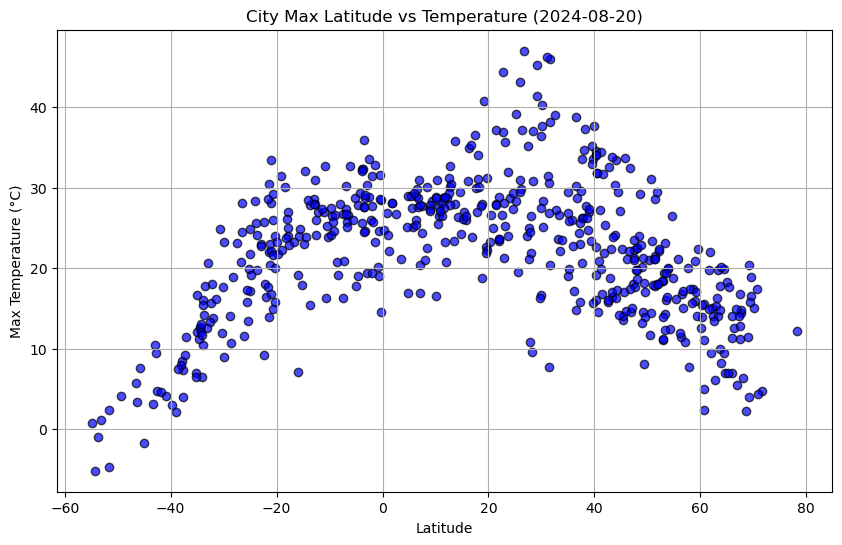

In [67]:
#Copy the df
city_data_copy = city_data_df.copy()

# Convert Max Temp from Kelvin to Celsius in the copied DataFrame
city_data_copy['Max Temp (C)'] = city_data_copy['Max Temp'] - 273.15

# Create the scatter plot using the copied DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(city_data_copy['Lat'], city_data_copy['Max Temp (C)'], color='blue', edgecolor='k', alpha=0.7)
plt.title('City Max Latitude vs Temperature (2024-08-20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)


# Save the figure
plt.savefig("C:\\Users\\tigra\\OneDrive\\Documents\\GitHub\\python-api-challenge\\WeatherPy\\output_data\\Fig1.png")

plt.show()

#### Latitude Vs. Humidity

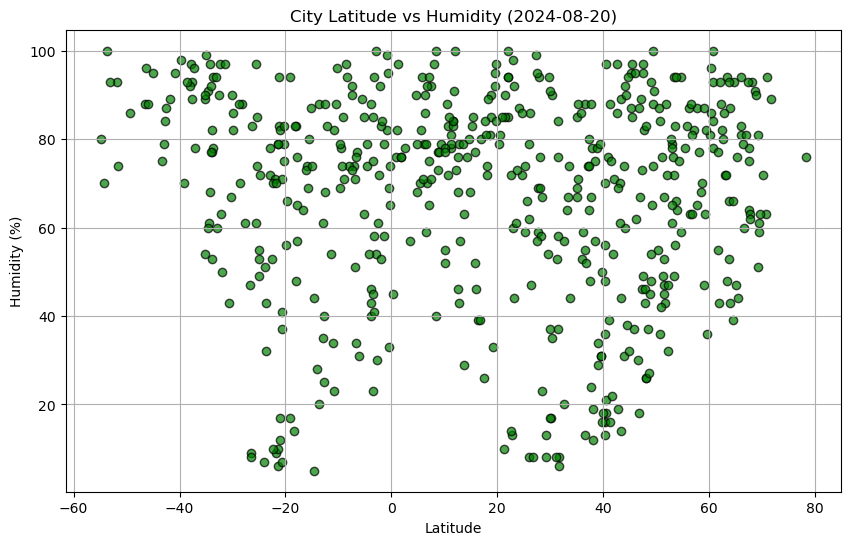

In [17]:
# Same scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(city_data_copy['Lat'], city_data_copy['Humidity'], color='green', edgecolor='k', alpha=0.7)
plt.title('City Latitude vs Humidity (2024-08-20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("C:\\Users\\tigra\\OneDrive\\Documents\\GitHub\\python-api-challenge\\WeatherPy\\output_data\\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

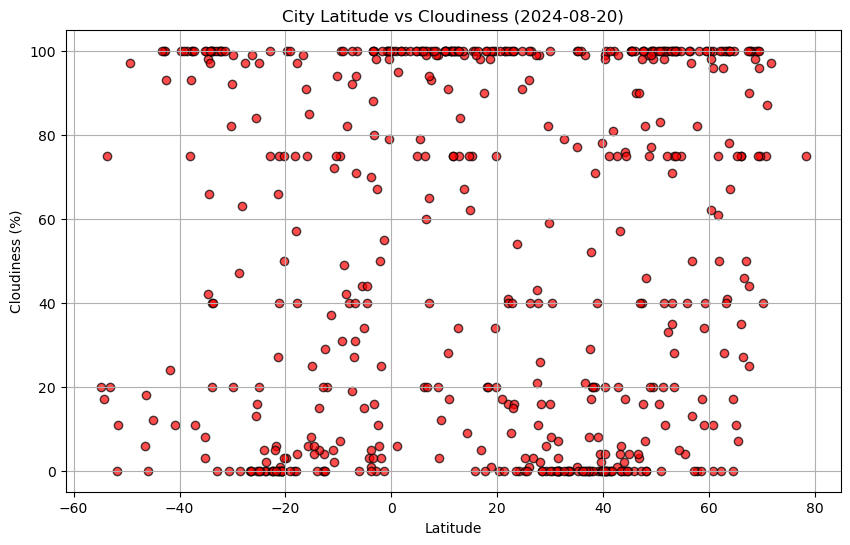

In [19]:
# Same scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(city_data_copy['Lat'], city_data_copy['Cloudiness'], color='red', edgecolor='k', alpha=0.7)
plt.title('City Latitude vs Cloudiness (2024-08-20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("C:\\Users\\tigra\\OneDrive\\Documents\\GitHub\\python-api-challenge\\WeatherPy\\output_data\\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

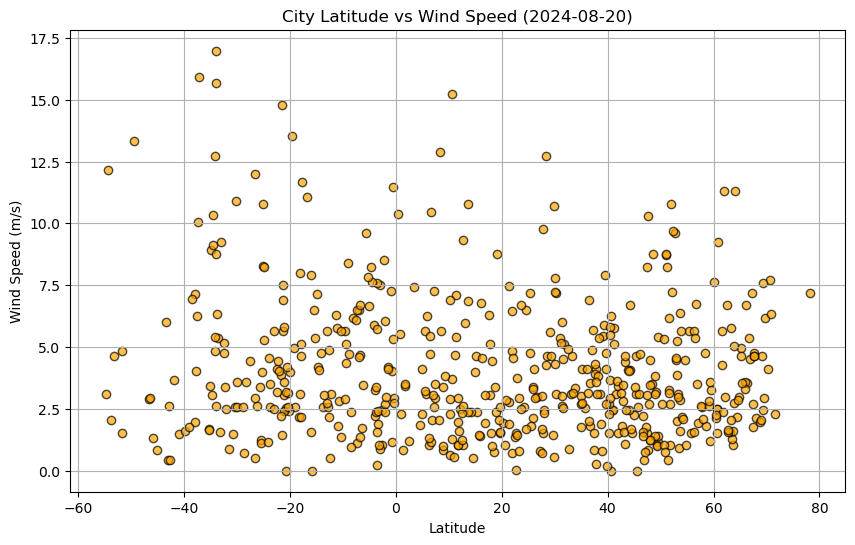

In [21]:
# Same scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(city_data_copy['Lat'], city_data_copy['Wind Speed'], color='orange', edgecolor='k', alpha=0.7)
plt.title('City Latitude vs Wind Speed (2024-08-20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("C:\\Users\\tigra\\OneDrive\\Documents\\GitHub\\python-api-challenge\\WeatherPy\\output_data\\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
def linear_regression(data_frame, x_axis, y_axis):
    # Extract latitude and humidity data
    x = data_frame[x_axis]
    y = data_frame[y_axis]

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    # Calculate the regression line
    regression_line = slope * x + intercept

    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', edgecolor='k', alpha=0.7, label='Data Points')
    plt.plot(x, regression_line, color='red', linestyle='--', label='Regression Line')
    plt.title(y_axis + str(' vs ') + x_axis)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.grid(True)
    plt.legend()

    # Display the R² value on the plot as well as the regression line
    r_squared = r_value**2
    plt.text(min(x), max(y), f'R² = {r_squared:.2f}', fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.7))
    plt.text(min(x), max(y) - (max(y) - min(y)) * 0.1, f'Equation: y = {slope:.2f}x + {intercept:.2f}', fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.7))

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.show()

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_copy[city_data_copy['Lat'] > 0]

northern_hemi_df['Max Temp (C)'] = northern_hemi_df['Max Temp'] - 273.15

# Display sample data
northern_hemi_df.head()

C:\Users\tigra\AppData\Local\Temp\ipykernel_18208\2510074950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northern_hemi_df['Max Temp (C)'] = northern_hemi_df['Max Temp'] - 273.15


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
6,bilibino,68.0550,166.4449,279.54,93,100,2.14,RU,1724258506,6.39
7,kodiak,57.7900,-152.4072,280.88,87,0,2.57,US,1724251700,7.73
9,dharchula,29.8491,80.5415,289.78,94,59,0.54,IN,1724198944,16.63
11,bethel,60.7922,-161.7558,284.18,100,100,9.26,US,1724253281,11.03
13,olyokminsk,60.3730,120.4388,287.11,96,62,2.13,RU,1724185541,13.96


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_copy[city_data_copy['Lat'] < 0]

southern_hemi_df['Max Temp (C)'] = southern_hemi_df['Max Temp'] - 273.15

# Display sample data
southern_hemi_df.head()

C:\Users\tigra\AppData\Local\Temp\ipykernel_18208\4117121981.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southern_hemi_df['Max Temp (C)'] = southern_hemi_df['Max Temp'] - 273.15


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
0,ji parana,-10.8778,-61.9278,305.83,23,2,1.79,BR,1724235406,32.68
1,piedade,-23.7074,-47.4252,297.29,43,2,3.51,BR,1724232629,24.14
2,port glaud,-4.6641,55.4178,301.02,74,40,8.23,SC,1724206932,27.87
3,papatowai,-46.5619,169.4708,278.84,88,6,2.88,NZ,1724268669,5.69
4,adamstown,-25.0667,-130.1002,290.31,55,97,8.29,PN,1724252540,17.16


###  Temperature vs. Latitude Linear Regression Plot

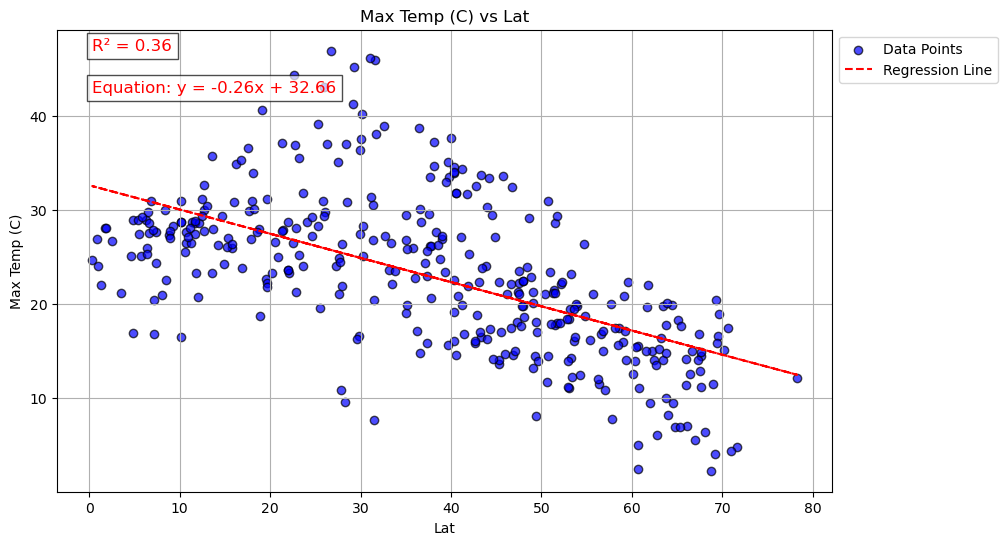

In [27]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df, 'Lat' , 'Max Temp (C)')

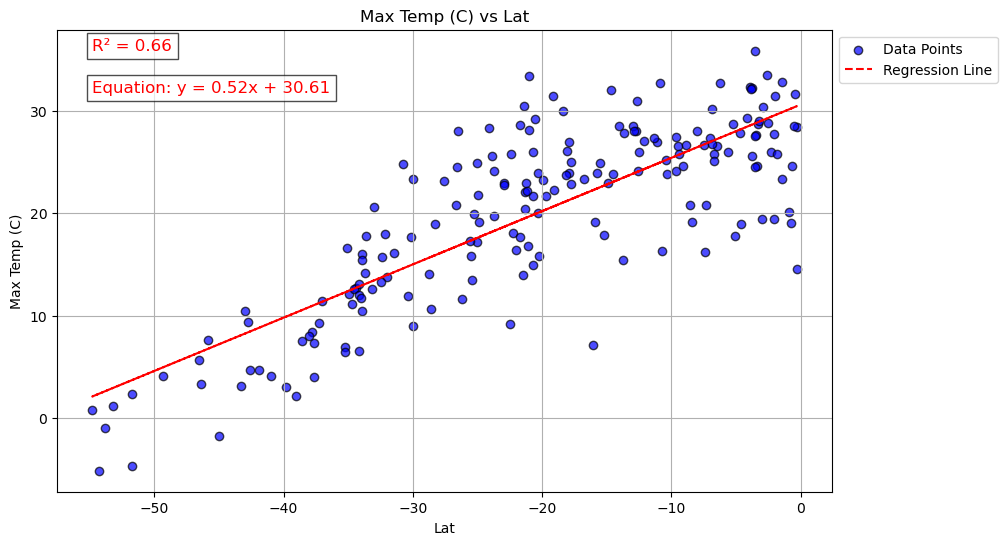

In [28]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df, 'Lat' , 'Max Temp (C)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In the northern hemisphere, there is a negative relationship between maximum temperature and latitude. The relationship between the two variables is adequate as the R2 value is 0.36. In the southern hemisphere, the relationship is positive and the correlation is stronger as the R2 value is 0.66. The data above confirms the previously believed relationship that the closer one is to the equator, the hotter it is.

### Humidity vs. Latitude Linear Regression Plot

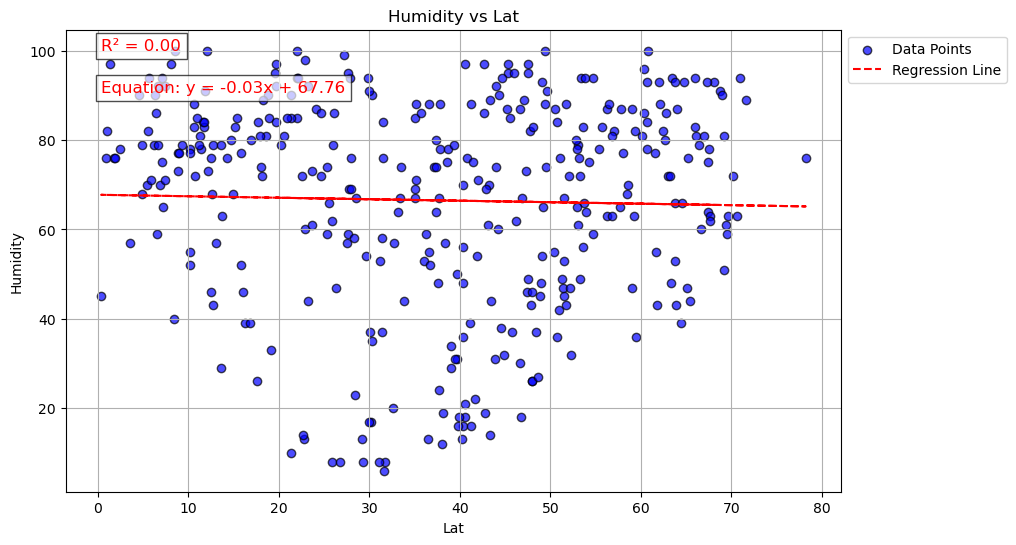

In [31]:
# Northern Hemisphere
linear_regression(northern_hemi_df, 'Lat' , 'Humidity')

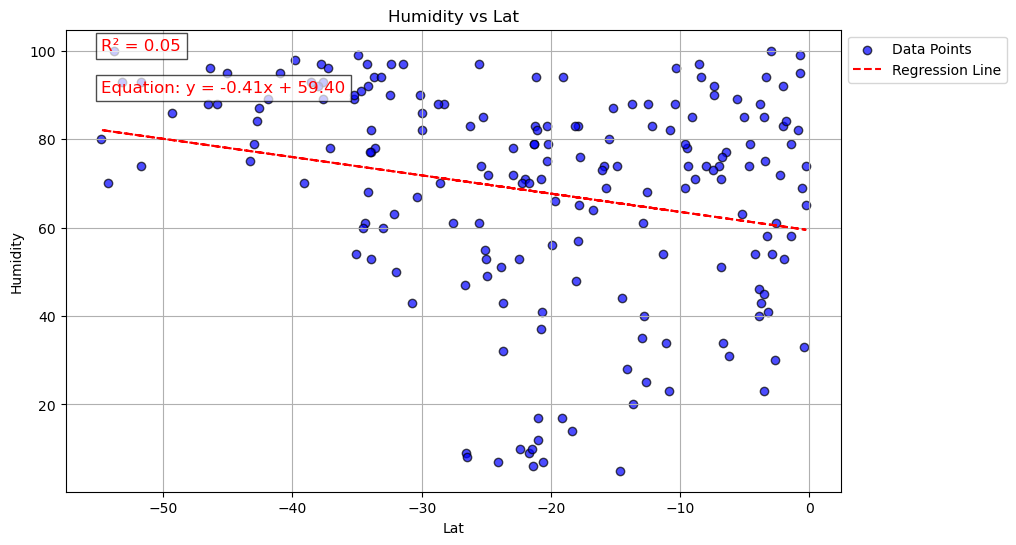

In [32]:
# Southern Hemisphere
linear_regression(southern_hemi_df, 'Lat' , 'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Relationship between humidity and latitude in the northern hemisphere is non-existent. The R2 value is zero. Relationship between the two in the southern hemisphere is very weak and is negative. Based on the data above, it is not possible to conclude that humidity has a relationship with latitude.

### Cloudiness vs. Latitude Linear Regression Plot

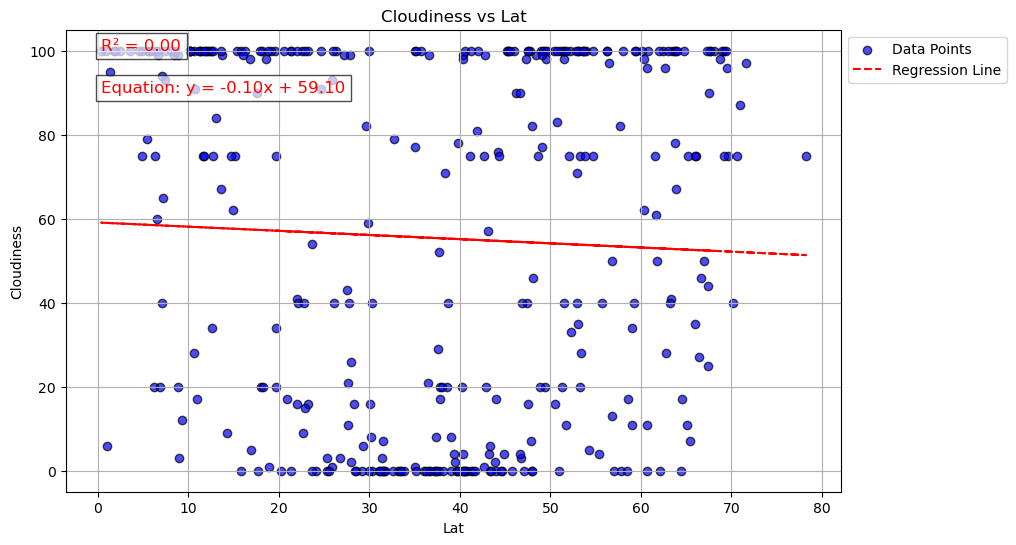

In [35]:
# Northern Hemisphere
linear_regression(northern_hemi_df, 'Lat' , 'Cloudiness')

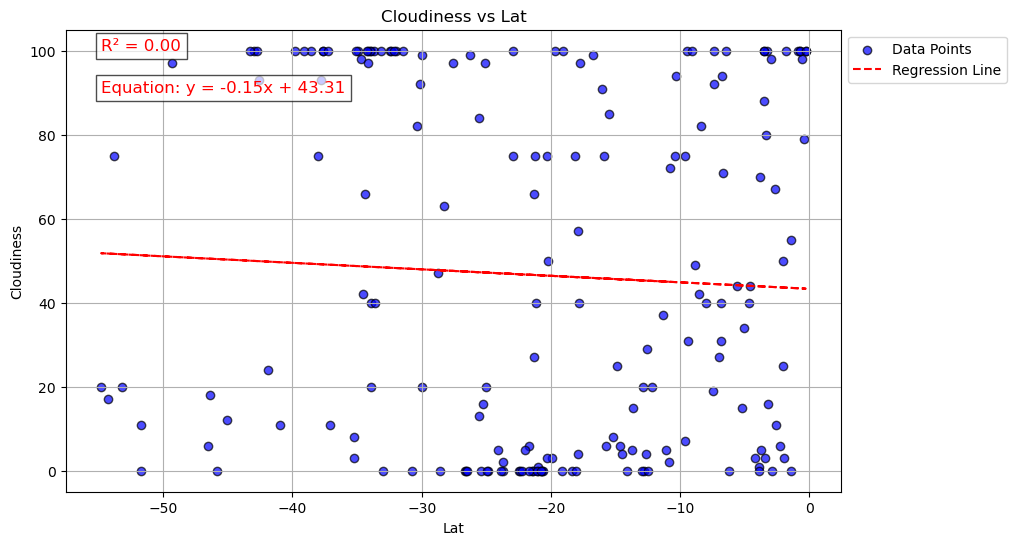

In [36]:
# Southern Hemisphere
linear_regression(southern_hemi_df, 'Lat' , 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Correlation virtually does not exist. R2 value is essentially zero. Cloudiness does not have a relationship with latitude in any case.

### Wind Speed vs. Latitude Linear Regression Plot

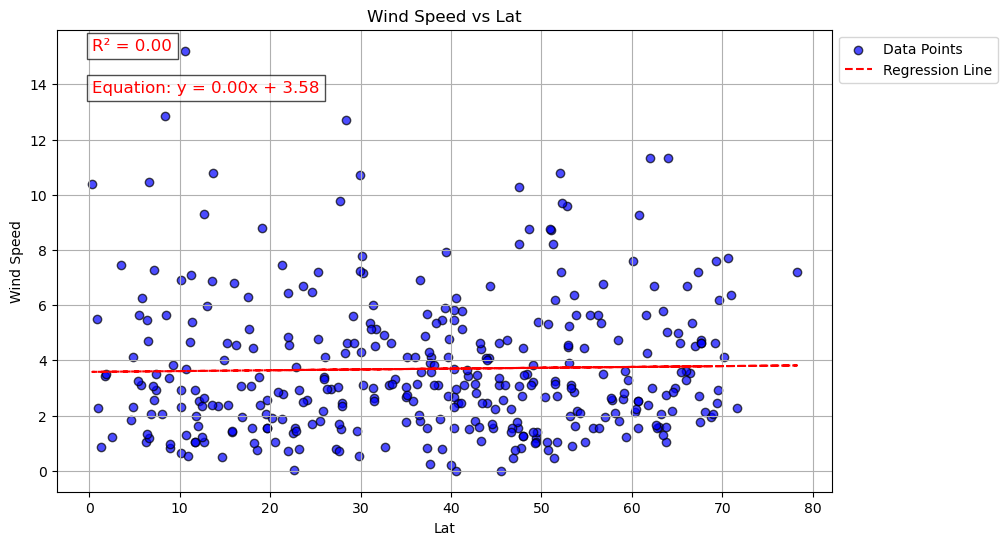

In [39]:
# Northern Hemisphere
linear_regression(northern_hemi_df, 'Lat' , 'Wind Speed')

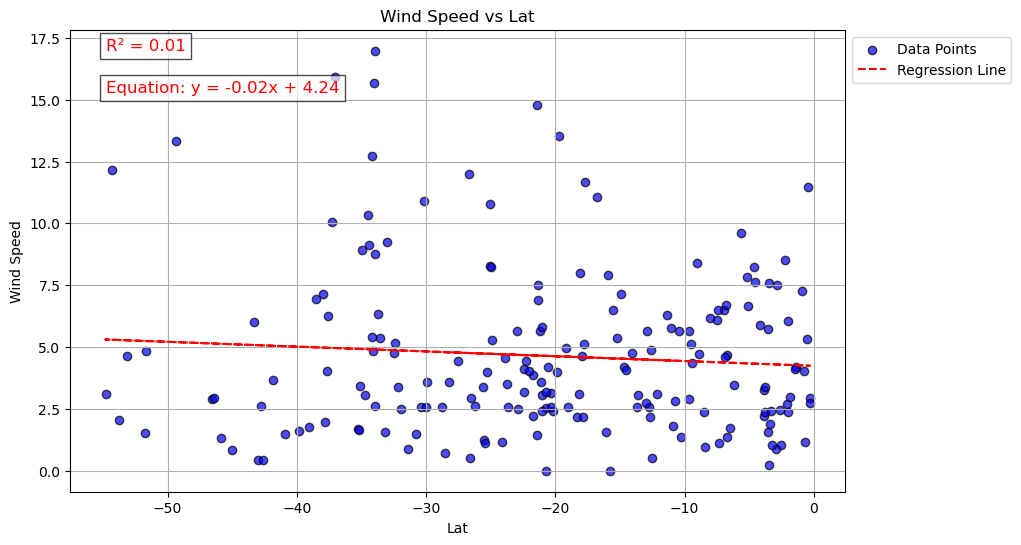

In [40]:
# Southern Hemisphere
linear_regression(southern_hemi_df, 'Lat' , 'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Correlation virtually does not exist. Wind speed vs latitude have no relationship according to the data above.